In [2]:
import loompy
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
from cytograph.pipeline import load_config, PunchcardDeck
from cytograph.plotting import colorize
from cytograph.embedding import art_of_tsne
from cytograph.visualization import scatterm
from cytograph.species import Species
from urllib.request import urlretrieve
from sknetwork.hierarchy import cut_straight
import scipy.cluster.hierarchy as hc
import numpy_groupies as npg
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy import sparse
import seaborn
import matplotlib as mpl
import gget
import pickle
import networkx as nx
from sklearn.ensemble import RandomForestClassifier

# suppress INFO
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

# make font changeable in Illustrator
mpl.rcParams['pdf.fonttype'] = 42

# save figure with no pad
mpl.rcParams['savefig.pad_inches'] = 0
mpl.rcParams['savefig.bbox'] = 'tight'

# set axes width
mpl.rcParams['axes.linewidth'] = 0.2
mpl.rcParams['xtick.minor.pad'] = 0
mpl.rcParams['xtick.major.pad'] = 0
mpl.rcParams['ytick.minor.pad'] = 0
mpl.rcParams['ytick.major.pad'] = 0
mpl.rcParams['xtick.minor.width'] = 0.2
mpl.rcParams['xtick.major.width'] = 0.2
mpl.rcParams['ytick.minor.width'] = 0.2
mpl.rcParams['ytick.major.width'] = 0.2

# use colorblind seaborn style
plt.style.use('seaborn-colorblind')

# colors for ROI Groups
color_dict = dict(
    zip(
        ["Cerebral cortex", "Hippocampus", "Cerebral nuclei", "Hypothalamus", "Thalamus", "Midbrain", "Pons", "Cerebellum", "Myelencephalon", "Spinal cord"],
        ['#4682f0', '#8eb7d1', '#89d8e0', '#f28e37', '#e7bc1f', '#43ad78', '#a7236e', '#ed5f8e', '#955ba5', '#eec2a4']
    )
)

In [6]:
folder = '/proj/human_adult/20220222/harmony/paris_top_bug/data/'
figure_folder = '/home/kimberly/figures/revision'

In [31]:
cbl = seaborn.color_palette('colorblind')
cbl

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [10]:
def clean_roi(roi_attr):
    return pd.Series(roi_attr).replace({r'[^\x00-\x7F]+':''}, regex=True).to_numpy()

# Eccentric medium spiny neuron (MSN) integration

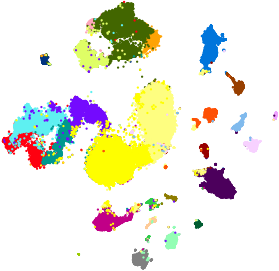

In [ ]:
with loompy.connect('/proj/human_adult/20220222/harmony/revision/data/Striatum.loom', 'r') as ds:

    plt.figure(None, (5, 5))
    plt.scatter(ds.ca.TSNE[:, 0], ds.ca.TSNE[:, 1], color=colorize(ds.ca.Clusters), s=5, lw=0, rasterized=True)
    plt.axis('off')
    plt.margins(0.01, 0.01)
    plt.show()

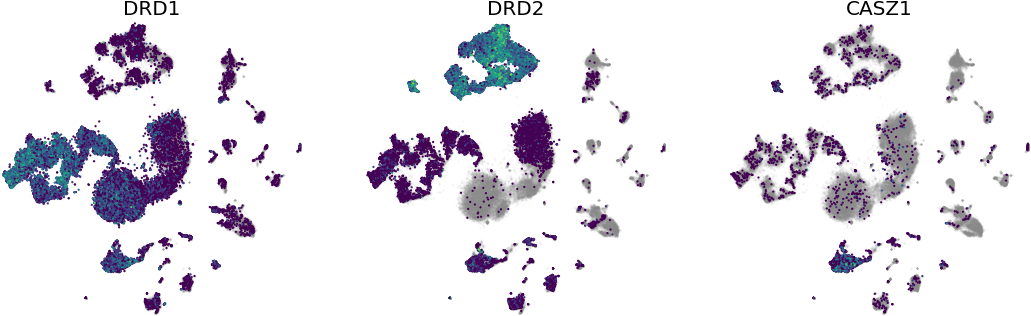

In [ ]:
with loompy.connect('/proj/human_adult/20220222/harmony/revision/data/Striatum.loom', 'r') as ds:

    plt.figure(None, (25, 25))
    gs = plt.GridSpec(4, 4)

    to_plot = ['DRD1', 'DRD2', 'CASZ1']
    
    
    for i, g in enumerate(to_plot):
        plt.subplot(gs[i])
        exp = np.log(ds[np.where(ds.ra.Gene == g)[0][0], :].flatten() + 1)
        cells = exp > 0
        plt.scatter(ds.ca.TSNE[:, 0], ds.ca.TSNE[:, 1], color='grey', alpha=0.05, s=5, lw=0, rasterized=True)
        plt.scatter(ds.ca.TSNE[cells, 0], ds.ca.TSNE[cells, 1], c=exp[cells], s=5, lw=0, rasterized=True)
        plt.axis('off')
        plt.title(g, fontsize=20)
        plt.margins(0.01, 0.01)
    plt.show()

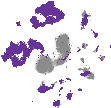

In [ ]:
with loompy.connect('/proj/human_adult/20220222/harmony/revision/data/Striatum.loom', 'r') as ds:

    plt.figure(None, (2, 2))
    
    cells = ds.ca.Species == 'Homo sapiens'
    plt.scatter(ds.ca.TSNE[:, 0], ds.ca.TSNE[:, 1], color='grey', s=1, alpha=0.05, lw=0, rasterized=True)
    plt.scatter(ds.ca.TSNE[cells, 0], ds.ca.TSNE[cells, 1], color='rebeccapurple', s=1, lw=0, rasterized=True)
    
    plt.axis('off')
    plt.margins(0.01, 0.01)
    
    plt.savefig(f'{figure_folder}/striatum_human.pdf', dpi=300) 

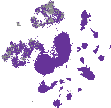

In [ ]:
with loompy.connect('/proj/human_adult/20220222/harmony/revision/data/Striatum.loom', 'r') as ds:

    plt.figure(None, (2, 2))
    
    cells = ds.ca.Species == 'Mus musculus'
    plt.scatter(ds.ca.TSNE[:, 0], ds.ca.TSNE[:, 1], color='grey', s=1, alpha=0.05, lw=0, rasterized=True)
    plt.scatter(ds.ca.TSNE[cells, 0], ds.ca.TSNE[cells, 1], color='rebeccapurple', s=1, lw=0, rasterized=True)
    
    plt.axis('off')
    plt.margins(0.01, 0.01)
    
    plt.savefig(f'{figure_folder}/striatum_mouse.pdf', dpi=300) 

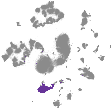

In [ ]:
with loompy.connect('/proj/human_adult/20220222/harmony/paris_top_bug/data/harmony_A_Q_Clean.loom', 'r') as ds:
    emsn_ids = ds.ca.CellID

with loompy.connect('/proj/human_adult/20220222/harmony/revision/data/Striatum.loom', 'r') as ds:

    plt.figure(None, (2, 2))
    
    cells = pd.Series(ds.ca.CellID).isin(emsn_ids).to_numpy()
    plt.scatter(ds.ca.TSNE[:, 0], ds.ca.TSNE[:, 1], color='grey', s=1, alpha=0.05, lw=0, rasterized=True)
    plt.scatter(ds.ca.TSNE[cells, 0], ds.ca.TSNE[cells, 1], color='rebeccapurple', s=1, lw=0, rasterized=True)
    
    plt.axis('off')
    plt.margins(0.01, 0.01)
    
    plt.savefig(f'{figure_folder}/striatum_eMSN_supercluster.pdf', dpi=300) 

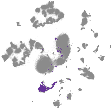

In [ ]:
with loompy.connect('/proj/human_adult/20220222/harmony/revision/data/MouseSaunders.loom', 'r') as ds:
    emsn_ids = ds.ca.CellID[np.isin(ds.ca.SaundersSubclusters, ['13-1', '13-2', '13-3'])]

with loompy.connect('/proj/human_adult/20220222/harmony/revision/data/Striatum.loom', 'r') as ds:

    plt.figure(None, (2, 2))
    
    cells = pd.Series(ds.ca.CellID).isin(emsn_ids).to_numpy()
    plt.scatter(ds.ca.TSNE[:, 0], ds.ca.TSNE[:, 1], color='grey', s=1, alpha=0.05, lw=0, rasterized=True)
    plt.scatter(ds.ca.TSNE[cells, 0], ds.ca.TSNE[cells, 1], color='rebeccapurple', s=1, lw=0, rasterized=True)
    
    plt.axis('off')
    plt.margins(0.01, 0.01)
    
    plt.savefig(f'{figure_folder}/striatum_eMSN_mouse.pdf', dpi=300) 

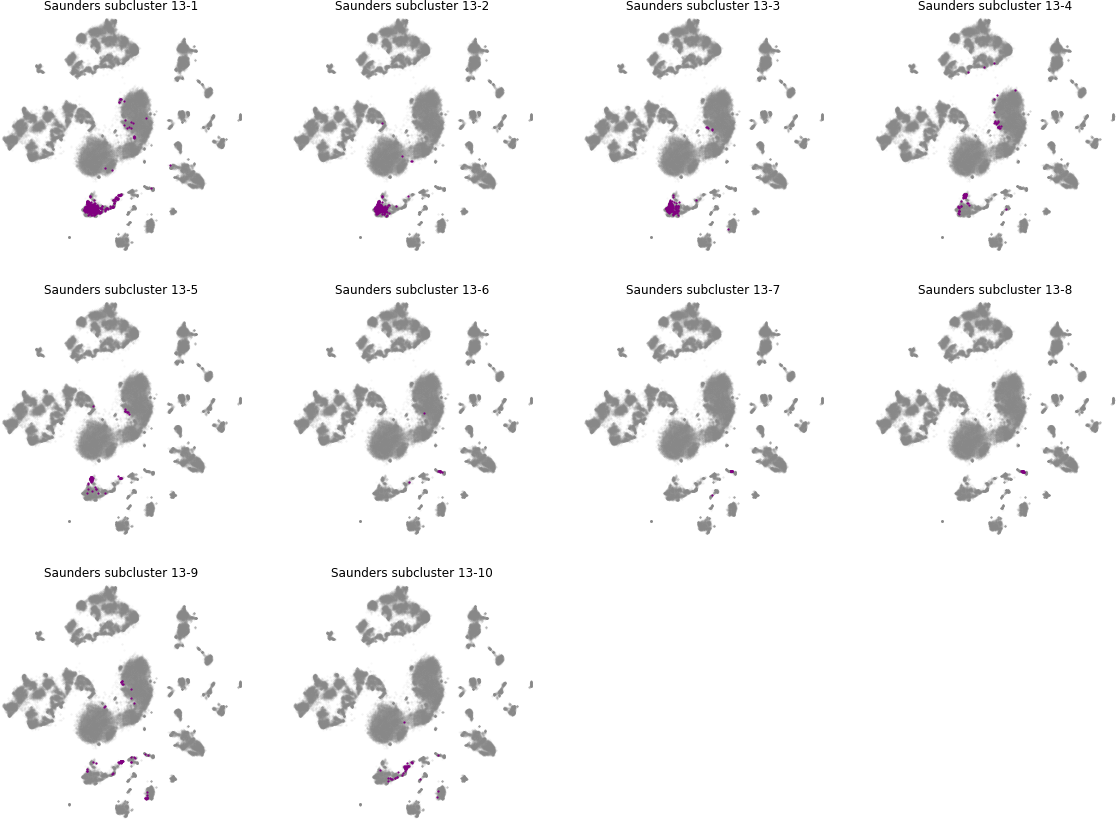

In [146]:
plt.figure(None, (20, 20))
gs = plt.GridSpec(4, 4)

for i in range(1, 11):

    with loompy.connect('/proj/human_adult/20220222/harmony/revision/data/MouseSaunders.loom', 'r') as ds:
        emsn_ids = ds.ca.CellID[ds.ca.SaundersSubclusters == f'13-{i}']

    with loompy.connect('/proj/human_adult/20220222/harmony/revision/data/Striatum.loom', 'r') as ds:

        plt.subplot(gs[i-1])
        cells = pd.Series(ds.ca.CellID).isin(emsn_ids).to_numpy()
        plt.scatter(ds.ca.TSNE[:, 0], ds.ca.TSNE[:, 1], color='grey', s=5, alpha=0.05, lw=0, rasterized=True)
        plt.scatter(ds.ca.TSNE[cells, 0], ds.ca.TSNE[cells, 1], color='purple', s=5, lw=0, rasterized=True)
        plt.axis('off')
        plt.title(f'Saunders subcluster 13-{i}')
        plt.margins(0.01, 0.01)

# Assessing the effect of index-hopping on the dataset

In [130]:
A_names = {
    'harmony_A_A': 'Splatter',
    'harmony_A_B': 'Deep-layer IT',
    'harmony_A_C_Clean': 'Upper-layer IT', 
    'harmony_A_D': 'Amygdala excitatory',
    'harmony_A_E_Clean': 'Miscellaneous',
    'harmony_A_F_Clean': 'MGE interneuron', 
    'harmony_A_G_Clean': 'CGE interneuron', 
    'harmony_A_H_Clean': 'Thalamic excitatory',
    'harmony_A_I_Clean': 'Deep-layer 6CT/b', 
    'harmony_A_J_Clean': 'Medium spiny neuron (MSN)', 
    'harmony_A_K_Clean_Clean': 'Upper rhombic lip', 
    'harmony_A_L_Clean': 'Cerebellar inhibitory', 
    'harmony_A_M': 'Hippocampus CA1-3', 
    'harmony_A_N_Clean_Clean': 'LAMP5-LHX6 and Chandelier', 
    'harmony_A_O_Clean': 'Hippocampus DG', 
    'harmony_A_P_Clean': 'Hippocampus CA4', 
    'harmony_A_Q_Clean': 'Eccentric MSN', 
    'harmony_A_R_Clean': 'Deep-layer NP', 
    'harmony_A_S_Clean': 'Midbrain-derived inhibitory',
    'harmony_A_T': 'Mammillary body',
    'harmony_A_U': 'Lower rhombic lip'  
}

In [184]:
supercluster_dict = dict(zip(list(A_names.values()), list(A_names.keys())))

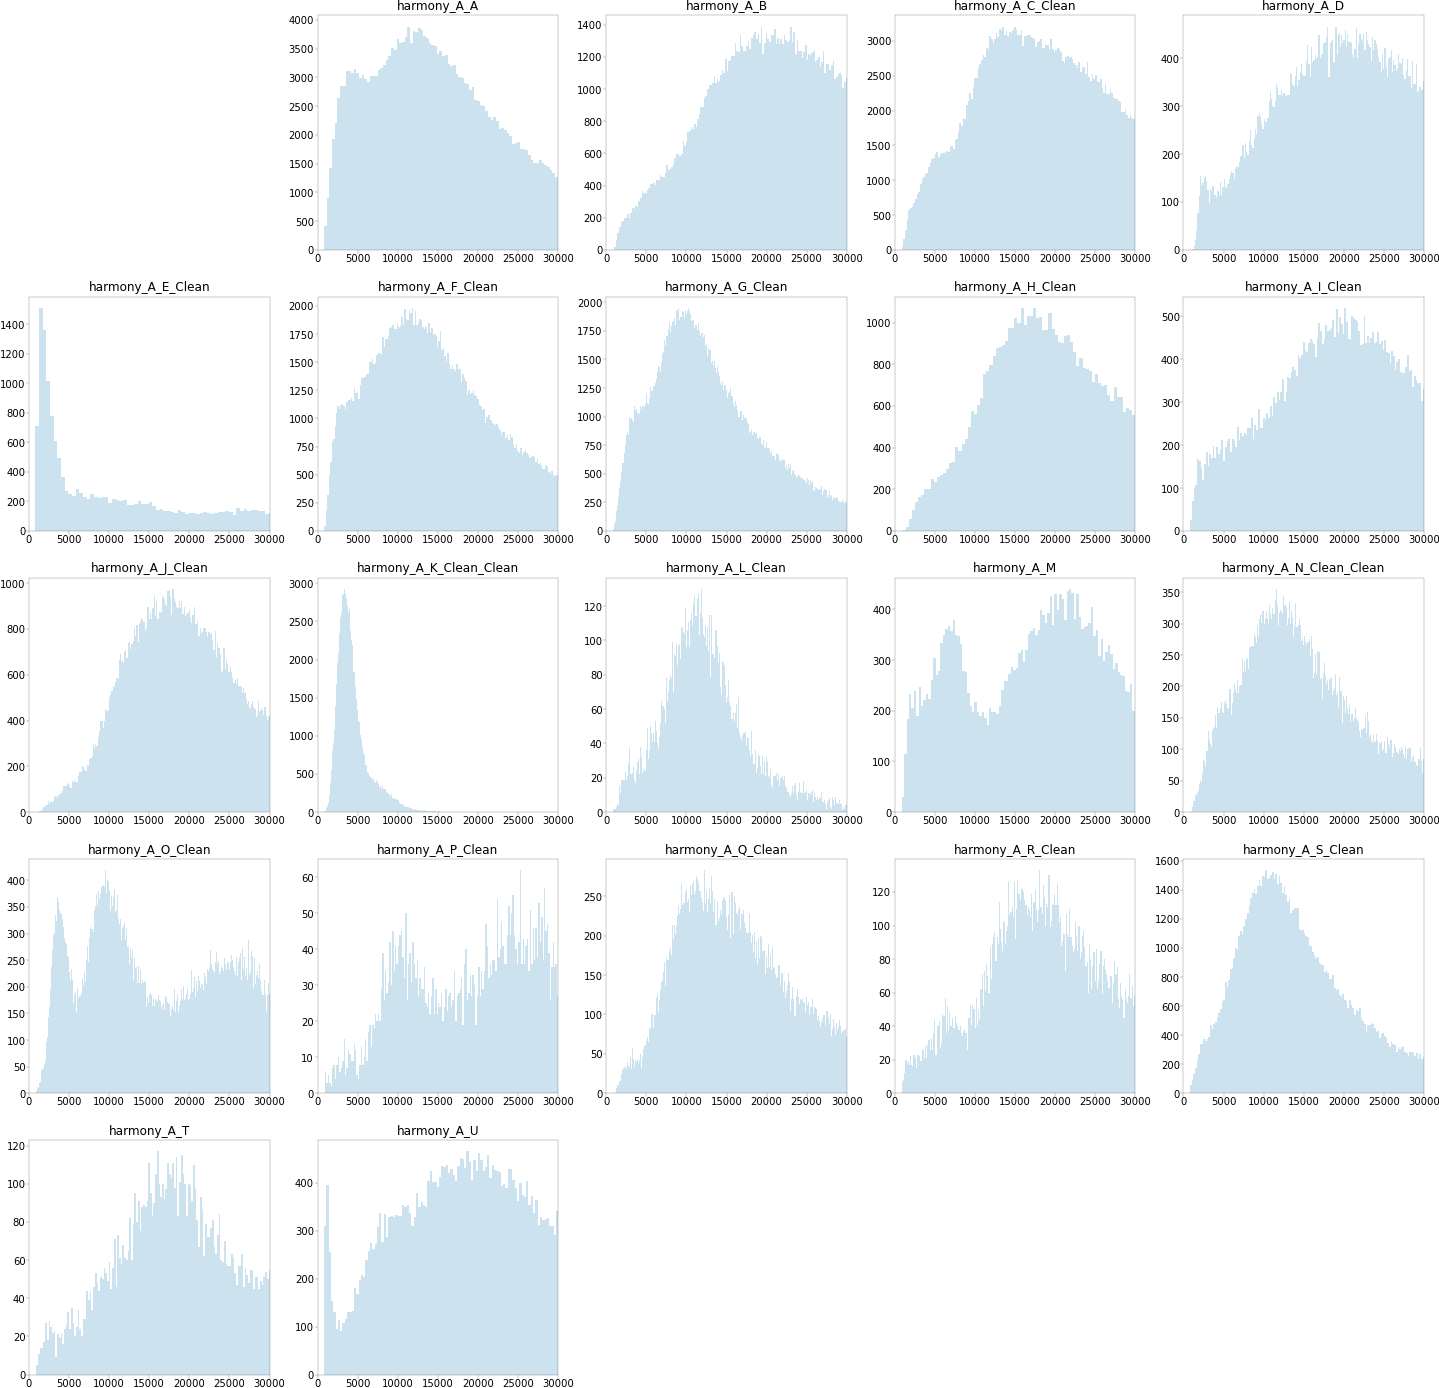

In [152]:
plt.figure(None, (25, 25))
gs = plt.GridSpec(5, 5)

i = 0
for subset in list(A_names.keys()):
    i += 1
    with loompy.connect(f'/proj/human_adult/20220222/harmony/paris_top_bug/data/{subset}.loom', 'r') as ds:
        plt.subplot(gs[i])
        plt.hist(ds.ca.TotalUMI, bins=1000, alpha=0.20)
        plt.xlim(0, 30_000)
        plt.title(subset)

In [304]:
min_cells = 1
umi_perc = 5
frac_cells = 0.90
n_cells = []

for subset in list(A_names.keys()):
    
    with loompy.connect(f'/proj/human_adult/20220222/harmony/paris_top_bug/data/{subset}.loom', 'r') as ds:
        
        grp_index = ds.ca.SampleID
        thres = np.percentile(ds.ca.TotalUMI, umi_perc)
        bad_samples = []
        
        for ix in np.unique(grp_index):
            
            total_cells = (grp_index == ix).sum()
            low_umi_cells = (ds.ca.TotalUMI[grp_index == ix] < thres).sum()
            low_umi_frac = low_umi_cells / total_cells
            
            if total_cells > min_cells and low_umi_frac >= frac_cells:
                reg = clean_roi(ds.ca.Roi)[grp_index == ix][0]
                print(subset, A_names[subset], ix, reg, total_cells)
                bad_samples += [ix]
                n_cells += [total_cells]
                
        low_umi_sample = pd.Series(grp_index).isin(bad_samples).to_numpy()
        # ds.ca.LowUmiSample = low_umi_sample

harmony_A_A Splatter 10X381_2 Human PN 26
harmony_A_B Deep-layer IT 10X249_1 Human V2 720
harmony_A_B Deep-layer IT 10X381_8 Human Sub 6
harmony_A_B Deep-layer IT 10X393_7 Human GPe 2
harmony_A_C_Clean Upper-layer IT 10X348_1 Human LG 3
harmony_A_C_Clean Upper-layer IT 10X350_6 Human CMN 2
harmony_A_C_Clean Upper-layer IT 10X359_3 Human Pul 2
harmony_A_C_Clean Upper-layer IT 10X359_8 Human VLN 2
harmony_A_C_Clean Upper-layer IT 10X380_5 Human HTHpo-HTHso 2
harmony_A_C_Clean Upper-layer IT 10X383_7 Human MG 2
harmony_A_C_Clean Upper-layer IT 10X386_5 Human PnAN 3
harmony_A_C_Clean Upper-layer IT 10X393_7 Human GPe 2
harmony_A_D Amygdala excitatory 10X159_2 Human M1C 3
harmony_A_D Amygdala excitatory 10X159_4 Human M1C 2
harmony_A_D Amygdala excitatory 10X354_1 Human PAG-DR 2
harmony_A_E_Clean Miscellaneous 10X354_6 Human ANC 2
harmony_A_E_Clean Miscellaneous 10X357_6 Human LG 2
harmony_A_E_Clean Miscellaneous 10X357_7 Human LP 4
harmony_A_E_Clean Miscellaneous 10X358_1 Human PAG 2
harmo

In [309]:
(np.array(n_cells) > 100).sum()

2

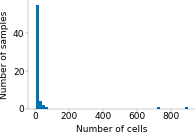

In [322]:
plt.figure(None, (3, 2))
ax = plt.subplot(111)
plt.hist(n_cells, bins=50)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
plt.xlabel("Number of cells", fontsize=9)
plt.ylabel("Number of samples", fontsize=9)
plt.savefig(f'{figure_folder}/index_hopping.pdf', dpi=300)


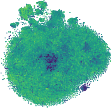

In [323]:
with loompy.connect(f'/proj/human_adult/20220222/harmony/paris_top_bug/data/harmony_A_U.loom', 'r') as ds:

    plt.figure(None, (2, 2))
    plt.scatter(ds.ca.TSNE[:, 0], ds.ca.TSNE[:, 1], c=np.log10(ds.ca.TotalUMI), s=1, lw=0, rasterized=True)
    plt.margins(0.01, 0.01)
    plt.axis('off')

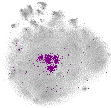

In [327]:
with loompy.connect(f'/proj/human_adult/20220222/harmony/paris_top_bug/data/harmony_A_U.loom', 'r') as ds:

    plt.figure(None, (2, 2))
    cells = clean_roi(ds.ca.Roi) == 'Human GPi'
    plt.scatter(ds.ca.TSNE[:, 0], ds.ca.TSNE[:, 1], c='grey', s=1, alpha=0.10, lw=0, rasterized=True)
    plt.scatter(ds.ca.TSNE[cells, 0], ds.ca.TSNE[cells, 1], c='purple', s=1, lw=0, rasterized=True)
    plt.margins(0.01, 0.01)
    plt.axis('off')